## Data Modelleren opdracht

In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import janitor

# autoreload changes from local files
%load_ext autoreload
%autoreload 2

# pandas show full output
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 200)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from datafundament.model import preprocess
from datafundament.model.visual import top_k_hist

## Analyse

In [3]:
df_raw = pd.read_excel('data/dummydataset_bestellingen.xlsx')
df_raw.head()

,Order ID,ProductNaam,Korting,Verkoop,Winst,Aantal,Categorie,Sub-Categorie,Besteldatum,KlantNaam,Stad,Land,Regio,Segment,VerzendDatum,VerstuurMethode,Provincie,Lengtegraad,breedtegraad
0,BN-2011-7407039,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm,18.068581,59.329324
1,AZ-2011-9050313,"Dania Corner Shelving, Traditional",0.0,854,290,7,Furniture,Bookcases,2011-01-03,Summer Hayward,Southport,United Kingdom,North,Consumer,2011-01-07,Economy,England,-3.010113,53.645708
2,AZ-2011-6674300,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,Office Supplies,Art,2011-01-04,Devin Huddleston,Valence,France,Central,Consumer,2011-01-08,Economy,Auvergne-Rhône-Alpes,4.892360,44.933393
3,BN-2011-2819714,"Boston Markers, Easy-Erase",0.5,27,-22,2,Office Supplies,Art,2011-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,2011-01-09,Economy,England,-1.890401,52.486243
4,BN-2011-2819714,"Eldon Folders, Single Width",0.5,17,-1,2,Office Supplies,Storage,2011-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,2011-01-09,Economy,England,-1.890401,52.486243


In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order ID         8047 non-null   object        
 1   ProductNaam      8047 non-null   object        
 2   Korting          8047 non-null   float64       
 3   Verkoop          8047 non-null   int64         
 4   Winst            8047 non-null   int64         
 5   Aantal           8047 non-null   int64         
 6   Categorie        8047 non-null   object        
 7   Sub-Categorie    8047 non-null   object        
 8   Besteldatum      8047 non-null   datetime64[ns]
 9   KlantNaam        8047 non-null   object        
 10  Stad             8047 non-null   object        
 11  Land             8047 non-null   object        
 12  Regio            8047 non-null   object        
 13  Segment          8047 non-null   object        
 14  VerzendDatum     8047 non-null   datetim

In [9]:
df_raw.describe()

,Korting,Verkoop,Winst,Aantal,Besteldatum,VerzendDatum,Lengtegraad,breedtegraad
count,8047.000000,8047.000000,8047.000000,8047.000000,8047,8047,8047.000000,8047.000000
mean,0.110047,291.845657,35.198211,3.772089,2013-04-19 12:25:40.748104704,2013-04-23 12:36:14.226419968,5.101519,48.607367
min,0.000000,3.000000,-3060.000000,1.000000,2011-01-01 00:00:00,2011-01-05 00:00:00,-9.224547,35.292277
25%,0.000000,48.000000,1.000000,2.000000,2012-06-08 00:00:00,2012-06-13 00:00:00,-0.341995,44.805830
50%,0.000000,117.000000,14.000000,3.000000,2013-06-11 00:00:00,2013-06-15 00:00:00,4.895168,49.027013
75%,0.100000,313.000000,47.000000,5.000000,2014-04-30 00:00:00,2014-05-04 12:00:00,9.993682,52.030228
max,0.850000,6517.000000,2476.000000,14.000000,2014-12-31 00:00:00,2015-01-05 00:00:00,26.945940,60.794533
std,0.181773,485.212156,178.125844,2.203369,NaN,NaN,6.488877,5.048068


In [10]:
df_raw.describe(include=object)

,Order ID,ProductNaam,Categorie,Sub-Categorie,KlantNaam,Stad,Land,Regio,Segment,VerstuurMethode,Provincie
count,8047,8047,8047,8047,8047,8047,8047,8047,8047,8047,8047
unique,4117,1810,3,17,792,999,15,3,3,4,127
top,AZ-2014-7040665,"Eldon File Cart, Single Width",Office Supplies,Art,Joel Peters,London,France,Central,Consumer,Economy,England
freq,11,26,5286,1152,32,219,1916,4426,4174,4862,1187


In [11]:
df_raw.shape

(8047, 19)

Wat valt op:
- Order ID: niet uniek, ID's komen vaker voor

Opschonen:
- Kolommnamen: naar snakecase voor consistentie
- Aankoopprijs toevoegen: Verkoopprijs - winst

Vragen:
- Wat betekent een dubbele order ID - mogelijk iedere rij is een product dat gekoppeld wordt aan een order
- Visualiseer verhoudingen: producten, categoriën, landen

Data model:
- order: klant + aantal producten per order
- klant: klant informatie en locatie
- product: productnaam en categorie
- 

## Clean data

In [12]:
df = preprocess.clean_data(df_raw)
df = preprocess.add_features(df)
df.head()

/Users/dknoors/Projects/datafundament/datafundament/model/preprocess.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['aankoopprijs'] = df['verkoop'] - df['winst']


,order_id,productnaam,korting,verkoop,winst,aantal,categorie,sub_categorie,besteldatum,klantnaam,stad,land,regio,segment,verzenddatum,verstuurmethode,provincie,lengtegraad,breedtegraad,aankoopprijs,winstmarge
0,BN-2011-7407039,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm,18.068581,59.329324,71,-57.777778
1,AZ-2011-9050313,"Dania Corner Shelving, Traditional",0.0,854,290,7,Furniture,Bookcases,2011-01-03,Summer Hayward,Southport,United Kingdom,North,Consumer,2011-01-07,Economy,England,-3.010113,53.645708,564,33.957845
2,AZ-2011-6674300,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,Office Supplies,Art,2011-01-04,Devin Huddleston,Valence,France,Central,Consumer,2011-01-08,Economy,Auvergne-Rhône-Alpes,4.892360,44.933393,119,15.000000
3,BN-2011-2819714,"Boston Markers, Easy-Erase",0.5,27,-22,2,Office Supplies,Art,2011-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,2011-01-09,Economy,England,-1.890401,52.486243,49,-81.481481
4,BN-2011-2819714,"Eldon Folders, Single Width",0.5,17,-1,2,Office Supplies,Storage,2011-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,2011-01-09,Economy,England,-1.890401,52.486243,18,-5.882353


## Visualize

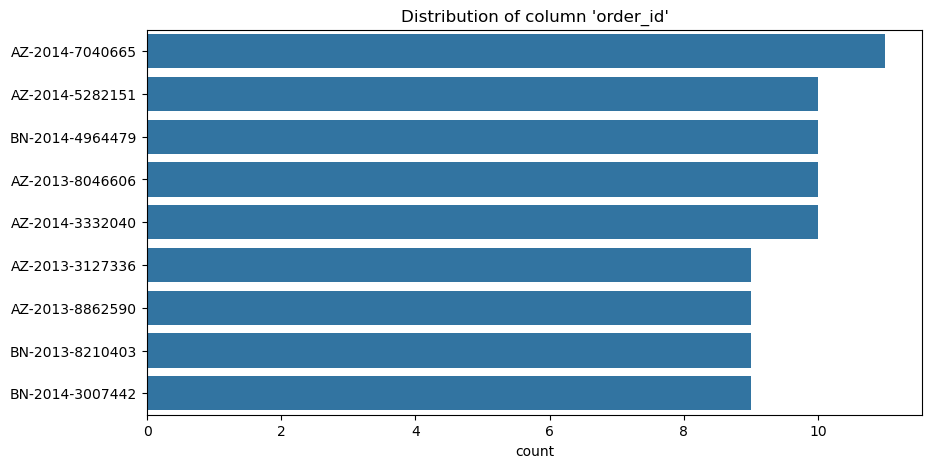

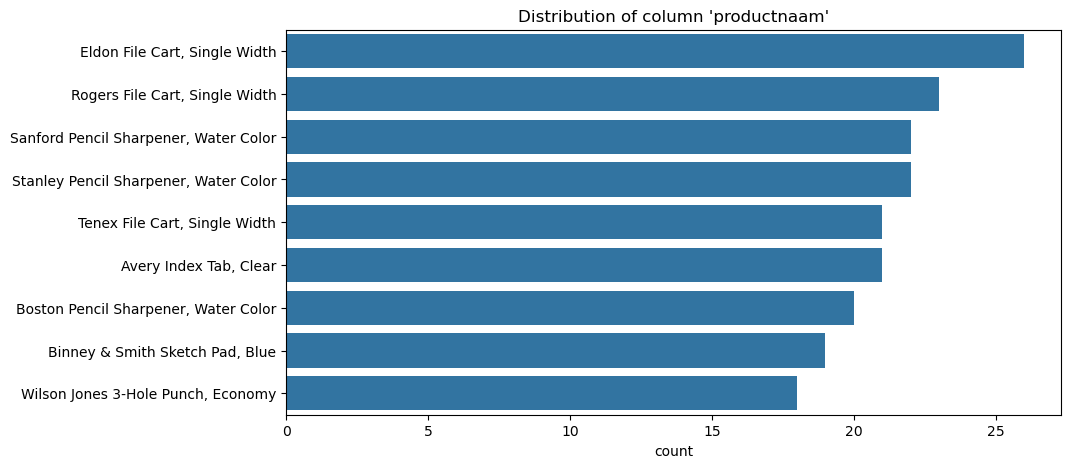

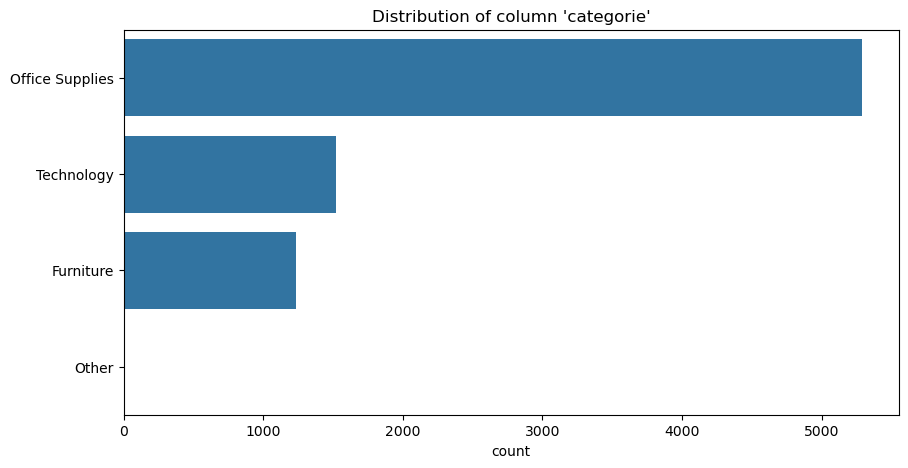

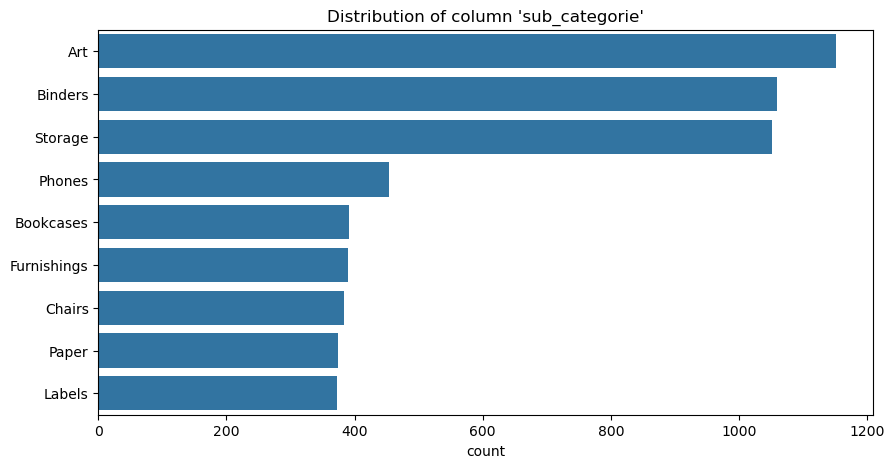

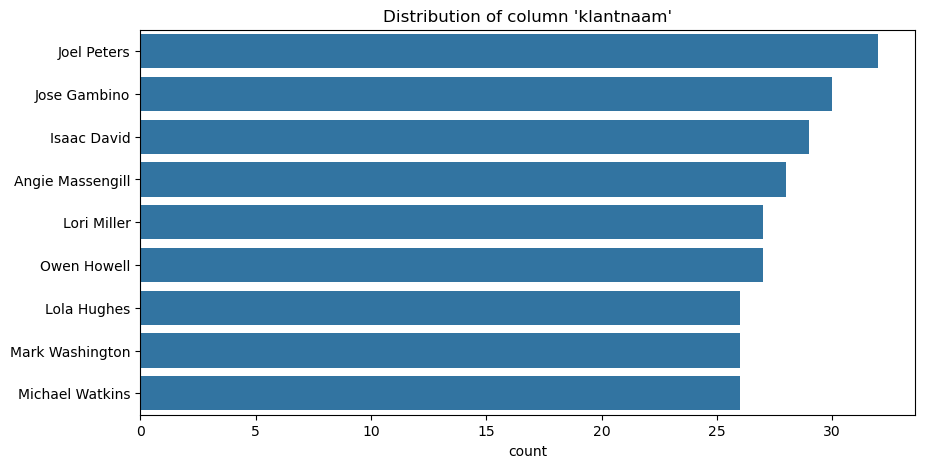

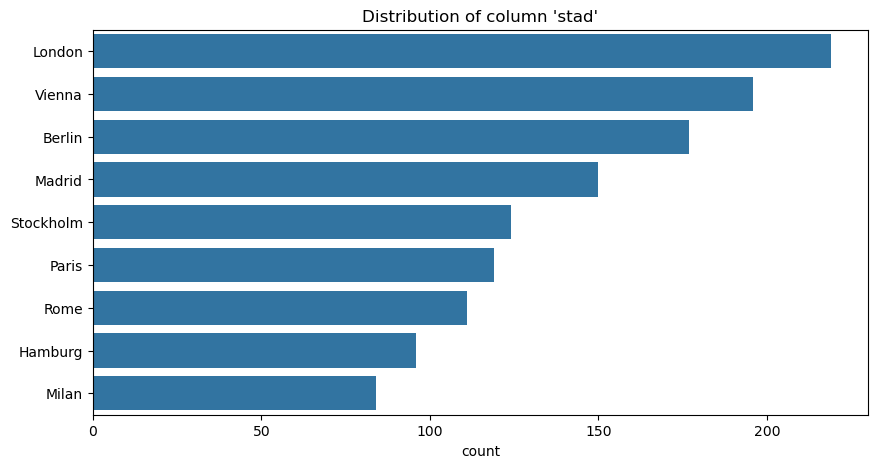

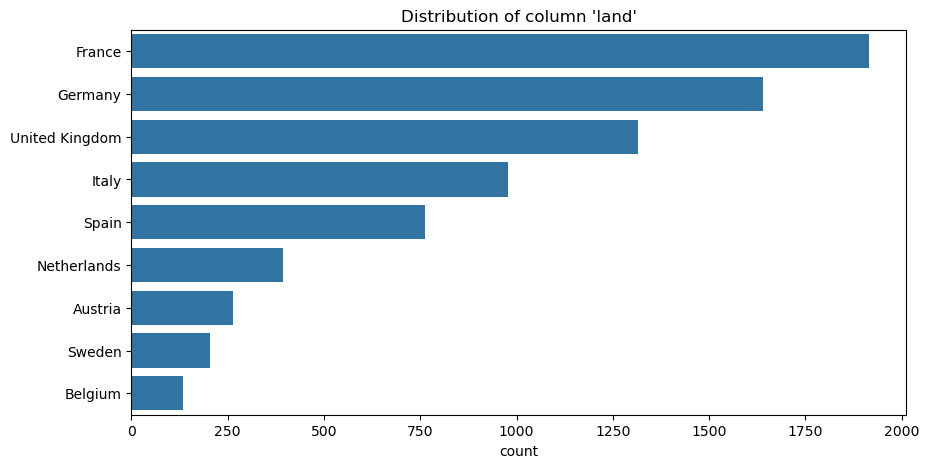

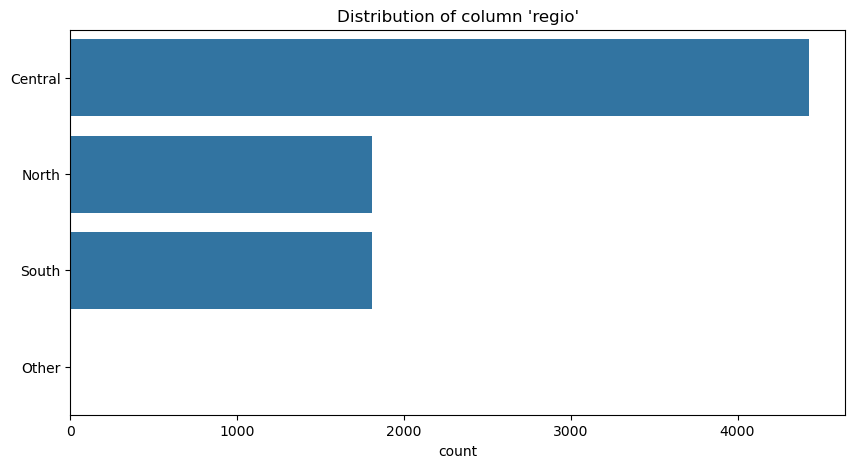

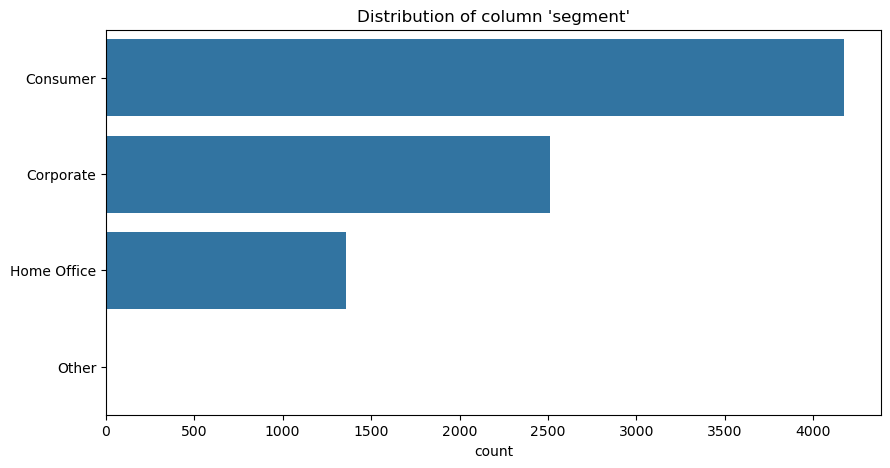

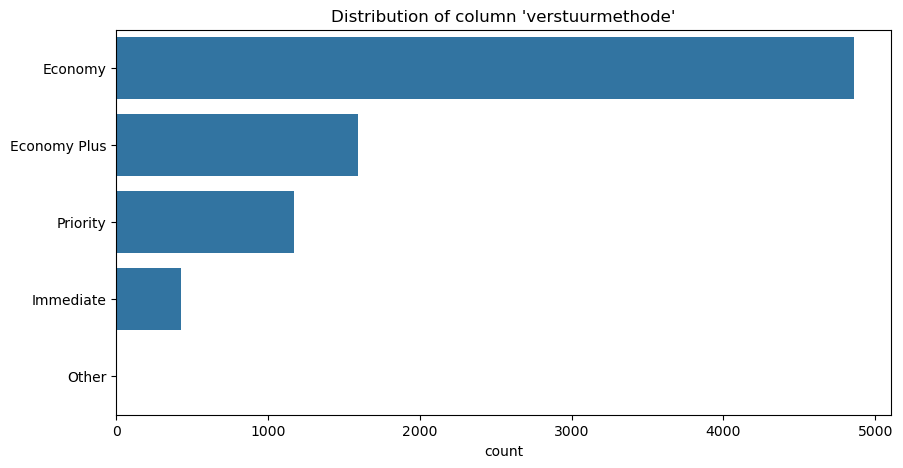

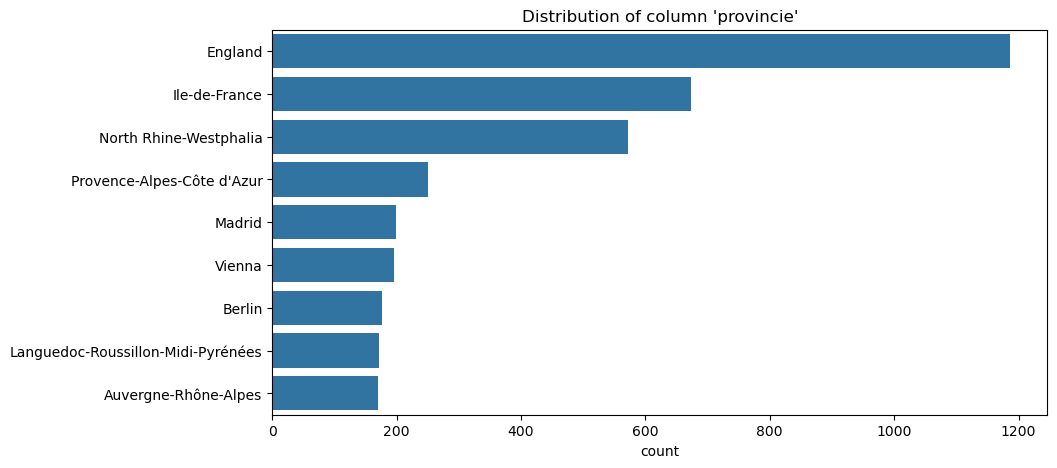

In [9]:
top_k_hist(df)

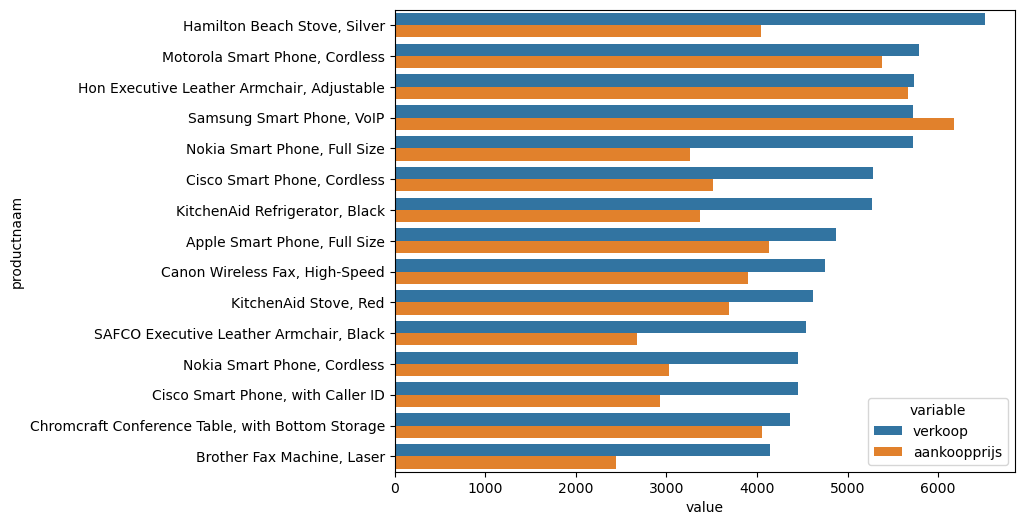

In [51]:

df_most_expensive_products = df.sort_values(by='verkoop', ascending=False).head(15).melt(id_vars=['productnaam', 'categorie', 'land'], value_vars=['verkoop', 'aankoopprijs'])

# plot 'verkoop' and 'aankoopprijs' for each product next to each other (not stacked)
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=df_most_expensive_products, x='value', y='productnaam', hue='variable', ax=ax)

plt.show()
